In [1]:
from os import chdir
chdir('/home/shoaib/Thesis/dmdt_Analysis/')
from dmdt_functions import get_differenciation, get_2Dhistogram, plot_dm_dt

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

plt.style.use('seaborn-v0_8')
plt.style.use('seaborn-v0_8-colorblind')

In [3]:
from pandas import read_csv, read_pickle, DataFrame
from numpy import histogram2d, linspace, save, unique, sqrt
from pathlib import Path
import matplotlib.cm as cm
from pathlib import Path


In [4]:
dmdt_by_OID_50x50 = '/home/shoaib/Thesis/dmdt_Analysis/Histograms/dmdt_by_OID_50x50.pkl'
dmdt_by_Name_Band_50x50 = '/home/shoaib/Thesis/dmdt_Analysis/Histograms/dmdt_by_Name_Band_50x50.pkl'

# These files do not exist yet, they are save paths for later in the notebook
dmdt_template_by_Type_Band_50x50 = '/home/shoaib/Thesis/dmdt_Analysis/Histograms/dmdt_template_by_Type_Band_50x50.pkl'

### Trying this out with a custom lightcurve

In [5]:
random_lightcurve = "/home/shoaib/PSChallenge/Lightcurves_by_OID/634109400009014.csv"

In [6]:
example_lightcurve = read_csv(random_lightcurve)
example_lightcurve

,name,oid_alerce,mjd,mag,magerr,band
0,SDSS J171634.68+262849.8,634109400009014,58203.398831,20.417780,0.150887,g
1,SDSS J171634.68+262849.8,634109400009014,58203.502268,20.137955,0.127206,g
2,SDSS J171634.68+262849.8,634109400009014,58204.424456,20.055620,0.120483,g
3,SDSS J171634.68+262849.8,634109400009014,58204.471713,20.159266,0.128973,g
4,SDSS J171634.68+262849.8,634109400009014,58204.472650,20.243555,0.136050,g
...,...,...,...,...,...,...
551,SDSS J171634.68+262849.8,634109400009014,59314.414086,20.092167,0.123445,g
552,SDSS J171634.68+262849.8,634109400009014,59316.382859,20.239718,0.135725,g
553,SDSS J171634.68+262849.8,634109400009014,59319.431192,20.098187,0.123936,g
554,SDSS J171634.68+262849.8,634109400009014,59322.424896,19.968603,0.113590,g


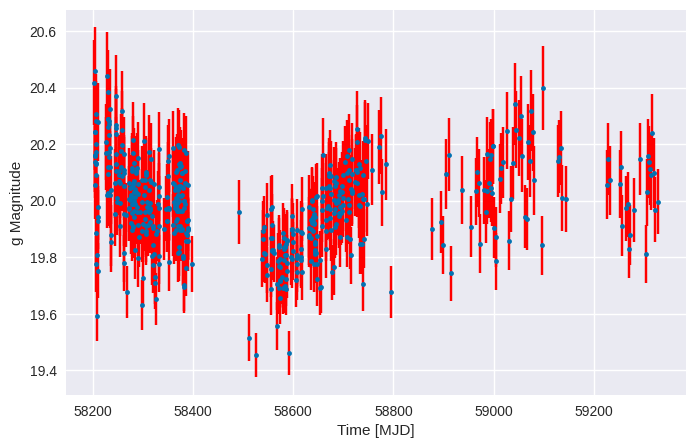

In [7]:
times, mags, magerrs= example_lightcurve['mjd'].to_numpy(), example_lightcurve['mag'].to_numpy(), example_lightcurve['magerr'].to_numpy()
plt.figure(figsize=(8,5))
plt.errorbar(times, mags, magerrs, fmt='.', ecolor='red')
plt.xlabel('Time [MJD]')
plt.ylabel('g Magnitude')
plt.show()

In [ ]:
dtimes, dmags = get_differenciation(times, mags)
hist, dt_edges, dm_edges  = get_2Dhistogram(dtimes=dtimes, dmagnitudes=dmags, dt_bins=50, dm_bins=50)

foo


/home/shoaib/Thesis/dmdt_Analysis/dmdt_functions.py:96: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


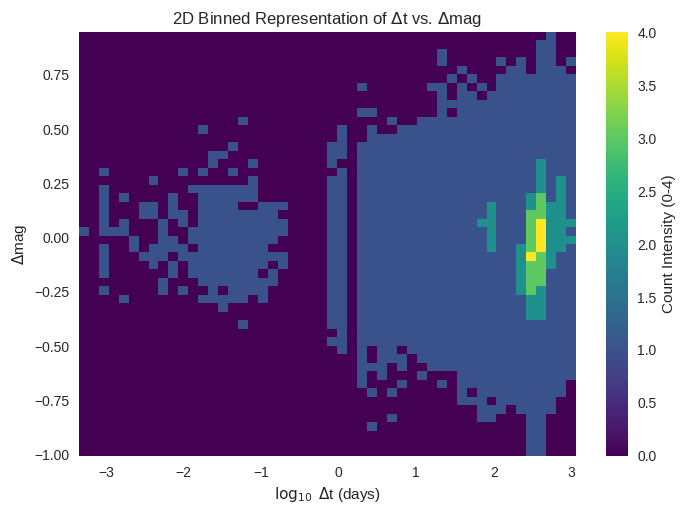

In [9]:
plot_dm_dt(hist, dt_edges=dt_edges, dm_edges=dm_edges)

### Let's Save $dm/dt$ templates by type and band!

In [10]:
dmdt_by_OID_50x50_df = read_pickle(dmdt_by_OID_50x50)

In [11]:
### Let's make templates by type and bands
grouped = dmdt_by_OID_50x50_df.groupby(['type', 'band'])
template_dict_list = []

for (object_type, band), df in grouped:
    hist = df['histogram'].sum()

    if hist.sum() == 0:
        continue

    hist_normalised = hist / hist.sum()
    tot_good_det = df['n_good_det'].sum()

    template_dict = {'type': object_type, 'band': band, 'tot_good_det': tot_good_det,
                     'histogram': hist, 'histogram_normalised': hist_normalised}
    template_dict_list.append(template_dict)

In [12]:
template_df = DataFrame(template_dict_list)
del dmdt_by_OID_50x50_df

In [13]:
### Let's make hists in the combined bands
grouped = template_df.groupby('type')

for object_type, df in grouped:
    if len(df) < 2:
        continue

    hist = df['histogram'].sum()
    hist_normalised = hist / hist.sum()
    tot_good_det = df['tot_good_det'].sum()

    template_dict = {'type': object_type, 'band': 'combined', 'tot_good_det': tot_good_det,
                     'histogram': hist, 'histogram_normalised': hist_normalised}
    template_dict_list.append(template_dict)

In [14]:
template_df = DataFrame(template_dict_list)
template_df = template_df.sort_values(by=['type', 'band'])

In [15]:
# template_df.to_pickle(dmdt_template_by_Type_Band_50x50)
template_df = pd.read_pickle(dmdt_template_by_Type_Band_50x50)

template_df

,type,band,tot_good_det,histogram,histogram_normalised
0,A,combined,2094058,"[[0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 4.0, 0.0, 1.0,...","[[0.0, 0.0, 0.0, 0.0, 2.104603792172766e-09, 0..."
1,A,g,880699,"[[0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 1.0,...","[[0.0, 0.0, 0.0, 0.0, 5.330820512483441e-09, 0..."
2,A,r,1213359,"[[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 4.0, 0.0, 0.0,...","[[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.391011954694..."
3,A2,combined,4793,"[[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,...","[[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,..."
4,A2,g,2160,"[[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,...","[[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,..."
...,...,...,...,...,...
82,QX,g,1102126,"[[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,...","[[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,..."
83,QX,r,1201472,"[[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,...","[[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,..."
84,Seyfert_1,combined,187828,"[[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,...","[[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,..."
85,Seyfert_1,g,87591,"[[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,...","[[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,..."


In [16]:
### Now plotting some templates
xbins, ybins = 51, 51
log_dt_bins = linspace(-4, 3.5, xbins)
dm_bins = linspace(-0.85, 0.8, ybins)

/home/shoaib/Thesis/dmdt_Analysis/dmdt_functions.py:96: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


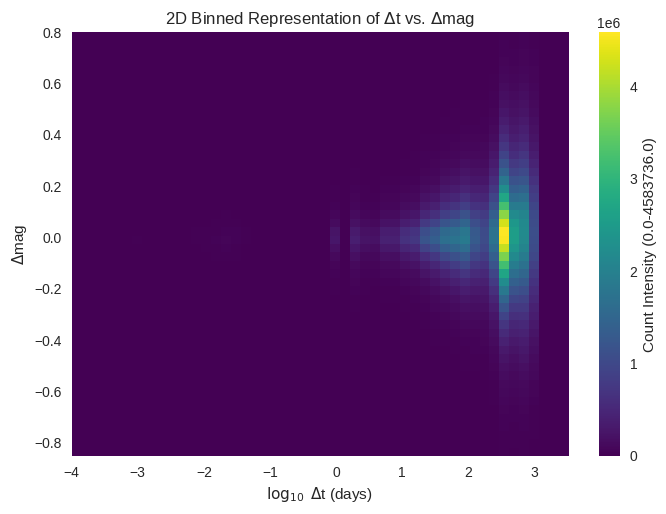

In [17]:

hist = template_df.iloc[82]['histogram']
plot_dm_dt(hist, dt_edges=log_dt_bins, dm_edges=dm_bins)